In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')


test=test.drop('Unnamed: 0', axis=1)
train=train.drop('Unnamed: 0', axis=1)

data=train

In [3]:
data.head(100)

,Row ID,Incident Datetime,Incident Day of Week,Report Type Code,Intersection,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,Current Supervisor Districts,Current Police Districts,target
0,86814469434,2019-11-08 14:00:00,Friday,IS,MARKET ST \ POWELL ST,Tenderloin,Financial District/South Beach,6.0,3.0,37.784560,-122.407337,19.0,3.0,5.0,1
1,112210668395,2022-02-15 16:30:00,Tuesday,II,FRESNO ST \ GRANT AVE,Central,North Beach,3.0,3.0,37.798490,-122.407149,106.0,3.0,6.0,0
2,79810969452,2019-05-05 03:30:00,Sunday,IS,OSGOOD PL \ PACIFIC AVE,Central,North Beach,3.0,3.0,37.797396,-122.402887,106.0,3.0,6.0,1
3,127781292541,2023-05-20 18:00:00,Saturday,II,GENEVA AVE \ MOSCOW ST \ SOUTH HILL BLVD,Ingleside,Excelsior,11.0,11.0,37.713143,-122.433707,58.0,1.0,9.0,7
4,73242481031,2018-10-30 02:31:00,Tuesday,IS,THORNTON AVE \ BAY SHORE BLVD \ CARROLL AVE,Ingleside,Portola,9.0,10.0,37.730658,-122.403400,91.0,9.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,101252767435,2021-03-12 13:20:00,Friday,II,NIAGARA AVE \ ALEMANY BLVD,Ingleside,Outer Mission,11.0,11.0,37.716970,-122.443431,80.0,1.0,9.0,15
96,80186627391,2019-05-17 10:05:00,Friday,II,GEARY ST \ POWELL ST,Central,Financial District/South Beach,3.0,3.0,37.787359,-122.408227,19.0,3.0,6.0,18
97,90424370602,2020-02-17 05:47:00,Monday,II,19TH ST \ ARKANSAS ST,Bayview,Potrero Hill,10.0,10.0,37.761184,-122.398338,54.0,9.0,2.0,5
98,110925992531,2022-01-01 23:00:00,Saturday,II,VICENTE ST \ 39TH AVE,Taraval,Sunset/Parkside,4.0,4.0,37.738379,-122.496855,39.0,7.0,10.0,7


In [4]:
# Преобразование Incident Datetime в datetime формат и извлечение года
data['Incident Datetime'] = pd.to_datetime(data['Incident Datetime'])
data['Year'] = data['Incident Datetime'].dt.year

# Фильтр по нужному году
year_filter = 2019
filtered_data = data[data['Year'] == year_filter]

# Группировка по Police District
grouped_data = filtered_data.groupby('Police District').agg({
    'Latitude': 'mean',  # Средняя широта по району
    'Longitude': 'mean', # Средняя долгота по району
    'target': 'count'    # Количество инцидентов
}).reset_index()

# Создание карты с начальной точкой
m = folium.Map(location=[grouped_data['Latitude'].mean(), grouped_data['Longitude'].mean()], zoom_start=12)

# Создание объекта кластеризации
marker_cluster = MarkerCluster().add_to(m)

# Добавление маркеров на карту для каждого района
for index, row in grouped_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Police District: {row['Police District']}<br>Incidents: {row['target']}",
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Сохранение карты в HTML файл
m.save('map.html')

# Отображение карты в Jupyter (если используешь Jupyter)
m

In [5]:
label_encoder = LabelEncoder()

categorical_columns = ['Incident Day of Week', 'Report Type Code', 'Police District', 'Analysis Neighborhood', 'Intersection']

data['Incident Datetime'] = pd.to_datetime(data['Incident Datetime'])
data['Year'] = data['Incident Datetime'].dt.year
data['Month'] = data['Incident Datetime'].dt.month
data['Day'] = data['Incident Datetime'].dt.day

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

data.head(10)

,Row ID,Incident Datetime,Incident Day of Week,Report Type Code,Intersection,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,Current Supervisor Districts,Current Police Districts,target,Year,Month,Day
0,86814469434,2019-11-08 14:00:00,0,1,3928,10,5,6.0,3.0,37.784560,-122.407337,19.0,3.0,5.0,1,2019,11,8
1,112210668395,2022-02-15 16:30:00,5,0,2699,1,22,3.0,3.0,37.798490,-122.407149,106.0,3.0,6.0,0,2022,2,15
2,79810969452,2019-05-05 03:30:00,3,1,4418,1,22,3.0,3.0,37.797396,-122.402887,106.0,3.0,6.0,1,2019,5,5
3,127781292541,2023-05-20 18:00:00,2,0,2931,2,4,11.0,11.0,37.713143,-122.433707,58.0,1.0,9.0,7,2023,5,20
4,73242481031,2018-10-30 02:31:00,5,1,5605,2,27,9.0,10.0,37.730658,-122.403400,91.0,9.0,2.0,3,2018,10,30
5,82954269394,2019-07-23 13:00:00,5,0,4845,3,18,8.0,8.0,37.767939,-122.425536,37.0,5.0,3.0,1,2019,7,23
6,124022073701,2022-11-22 16:00:00,5,0,129,5,19,6.0,6.0,37.773467,-122.391434,34.0,10.0,1.0,4,2022,11,22
7,61988768515,2018-01-03 17:39:00,6,0,5952,1,3,3.0,3.0,37.798373,-122.410456,107.0,3.0,6.0,0,2018,1,3
8,94985671407,2020-07-15 13:00:00,6,3,3739,0,0,10.0,10.0,37.743850,-122.398522,85.0,9.0,2.0,10,2020,7,15
9,128944271402,2023-06-24 12:00:00,2,0,4389,2,27,10.0,10.0,37.720409,-122.400736,91.0,9.0,9.0,10,2023,6,24


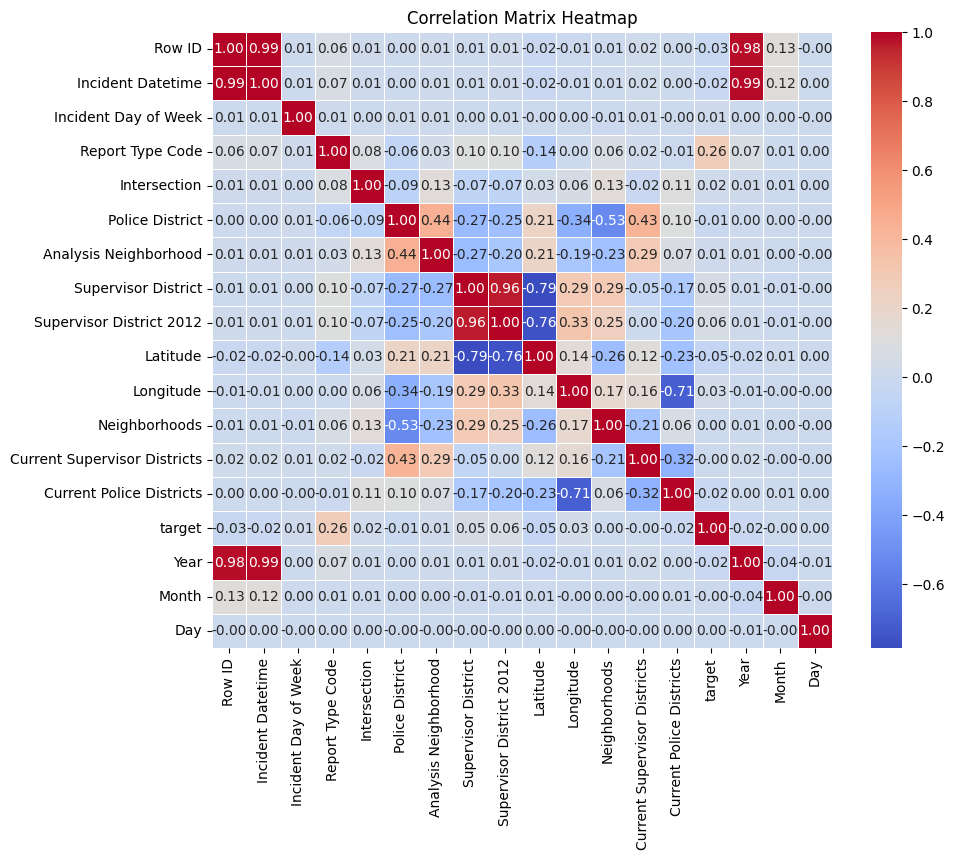

In [6]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()